In [ ]:
from keys import api_keys
import openai

openai.api_key = api_keys.keys['openai']

# Testing chatbot messages

In [ ]:
question = "What is the average output of a 1m2 solar panel?"

completion = openai.ChatCompletion.create(
    model = "gpt-3.5-turbo",
    messages = [{"role": "user", "content": question}]
)

print(completion.choices[0].message.content)

In [ ]:
message_history = []
user_input = input(">: ")

In [ ]:
message_history.append({"role": "user", "content": user_input})
completion = openai.ChatCompletion.create(
    model = "gpt-3.5-turbo",
    messages = message_history
)

reply_content = completion.choices[0].message.content
print(reply_content)

In [ ]:
message_history.append({"role": "assistant", "content": reply_content})


In [ ]:
user_input = input(">: ")
message_history.append({"role": "user", "content": user_input})
completion = openai.ChatCompletion.create(
    model = "gpt-3.5-turbo",
    messages = message_history
)

reply_content = completion.choices[0].message.content
print(reply_content)
message_history.append({"role": "assistant", "content": reply_content})


In [ ]:
user_input = input(">: ")
message_history.append({"role": "user", "content": user_input})
completion = openai.ChatCompletion.create(
    model = "gpt-3.5-turbo",
    messages = message_history
)

reply_content = completion.choices[0].message.content
print(reply_content)
message_history.append({"role": "assistant", "content": reply_content})

In [ ]:
message_history = []
def chat(input, role= "user"):
    message_history.append({"role": role, "content": input})
    completion = openai.ChatCompletion.create(
        model = "gpt-3.5-turbo",
        messages = message_history
    )

    reply_content = completion.choices[0].message.content
    print(reply_content)
    message_history.append({"role": "assistant", "content": reply_content})
    return(reply_content)

for i in range(2):
    chat(input(">> "))

# Chatbot Interface

In [ ]:
import gradio as gr

In [ ]:

message_history = [
    {"role": "system", "content": 
     """
     You are an educational AI Assistant for higher education. 
     You help students solve a complex problem using analytics and python.
     Do not provide them the full answer to their questions, but guide them and point them in the right direction. 
     Ask for clarifying questions when necessary and try to be concise with your responses.
     """
     },
]


def predict(input):
    global message_history
    message_history.append({"role": "user", "content": input})
    chat = openai.ChatCompletion.create(
        model="gpt-3.5-turbo", 
        messages=message_history
    )
    reply = chat.choices[0].message.content
    message_history.append({"role": "assistant", "content": reply})
    response = [(message_history[i]["content"], message_history[i+1]["content"]) 
                for i in range(1, len(message_history)-1, 2)]
    return response
    
    
with gr.Blocks() as demo:
    chatbot = gr.Chatbot()
    with gr.Row():
        txt = gr.Textbox(show_label=False, placeholder="Ask me anything about the task!").style(container=False)
        txt.submit(predict, txt, chatbot)
        txt.submit(None, None, txt, _js="() => {''}")

demo.launch()

In [ ]:
print(message_history)

# Solar Panel ChatGPT messages

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Specify the location (latitude and longitude)
lat = 50.1109
lon = 8.6821

# Specify the PV system parameters
pv_system = {
    'peakpower': 1,  # kWp
    'loss': 14,  # system losses in %
    'fixedtilt': 1,  # 1 for fixed tilt, 0 for 2-axis tracking
    'angle': 30,  # tilt angle in degrees
    'aspect': 0  # azimuth angle in degrees
}

# Make the API request
response = requests.get(f'https://re.jrc.ec.europa.eu/api/seriescalc?lat={lat}&lon={lon}&outputformat=json', params=pv_system)
data = response.json()

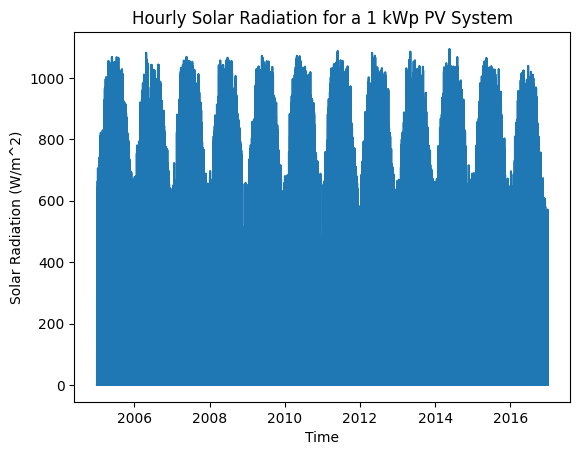

In [2]:
# Parse the data
df = pd.DataFrame(data['outputs']['hourly'])
df['time'] = pd.to_datetime(df['time'], format='%Y%m%d:%H%M')

# Plot the hourly solar radiation
plt.plot(df['time'], df['G(i)'])
plt.xlabel('Time')
plt.ylabel('Solar Radiation (W/m^2)')
plt.title('Hourly Solar Radiation for a 1 kWp PV System')
plt.show()

C:\Users\mvall\AppData\Local\Temp\ipykernel_34020\783817773.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\mvall\AppData\Local\Temp\ipykernel_34020\783817773.py:29: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['radiation'] = countries.geometry.centroid.apply(lambda x: get_yearly_average_radiation(x.y, x.x))
c:\Users\mvall\Pycharm Projects\ChatbotTest\venv\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

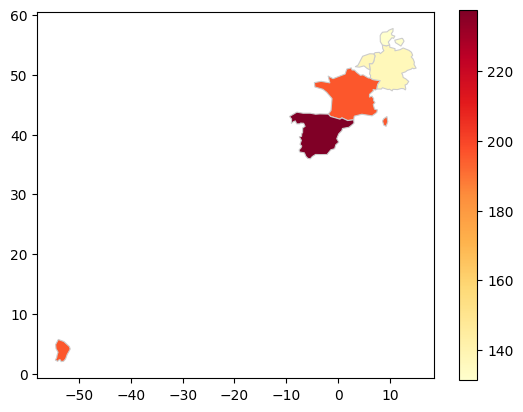

In [5]:
import geopandas as gpd
import requests
import matplotlib.pyplot as plt

# Get the world countries data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for the Netherlands, Denmark, and Germany
countries = world[world['name'].isin(['Netherlands', 'Denmark', 'Germany', 'France', 'Spain'])]

# Define a function to get the yearly average solar radiation for a specific location
def get_yearly_average_radiation(lat, lon):
    pv_system = {
        'peakpower': 1,
        'loss': 14,
        'fixedtilt': 1,
        'angle': 30,
        'aspect': 0
    }
    response = requests.get(f'https://re.jrc.ec.europa.eu/api/seriescalc?lat={lat}&lon={lon}&outputformat=json', params=pv_system)
    data = response.json()
    df = pd.DataFrame(data['outputs']['hourly'])
    df['time'] = pd.to_datetime(df['time'], format='%Y%m%d:%H%M')
    df['year'] = df['time'].dt.year
    yearly_average = df.groupby('year')['G(i)'].mean().mean()  # Average over all years
    return yearly_average

# Get the yearly average solar radiation for the centroid of each country
countries['radiation'] = countries.geometry.centroid.apply(lambda x: get_yearly_average_radiation(x.y, x.x))

# Plot the map with the heatmap
fig, ax = plt.subplots(1, 1)
countries.plot(column='radiation', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.show()
